In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load combined CSV file (created earlier)
df = pd.read_csv("/content/combined_inventory_suppliers_120.csv")

# Preview data
print(df.head())


   ProductID          ProductName     Category  UnitCost  QuantityInStock  \
0          1      North Product 1         Toys     58.75               47   
1          2      Light Product 2        Books    404.56                0   
2          3      Again Product 3     Clothing     96.22               56   
3          4        Ask Product 4  Electronics     54.01               90   
4          5  According Product 5  Electronics    107.16               21   

   ReorderLevel  SupplierID                    SupplierName  \
0            12           1               Fitzpatrick-Black   
1            20           2                      Hart-Lopez   
2            21           3  Peterson, Donaldson and Nelson   
3            22           4       Lutz, Guerrero and Miller   
4            25           5      White, Phillips and Barton   

          ContactName               ContactEmail  
0  Katherine Anderson     huynhkaren@example.net  
1           James Kim        donna14@example.net  
2    

In [4]:
# Add a new column for inventory value
df['InventoryValue'] = df['UnitCost'] * df['QuantityInStock']

# Total inventory value
total_inventory_value = df['InventoryValue'].sum()
print("Total Inventory Value: $", round(total_inventory_value, 2))


Total Inventory Value: $ 1542800.52


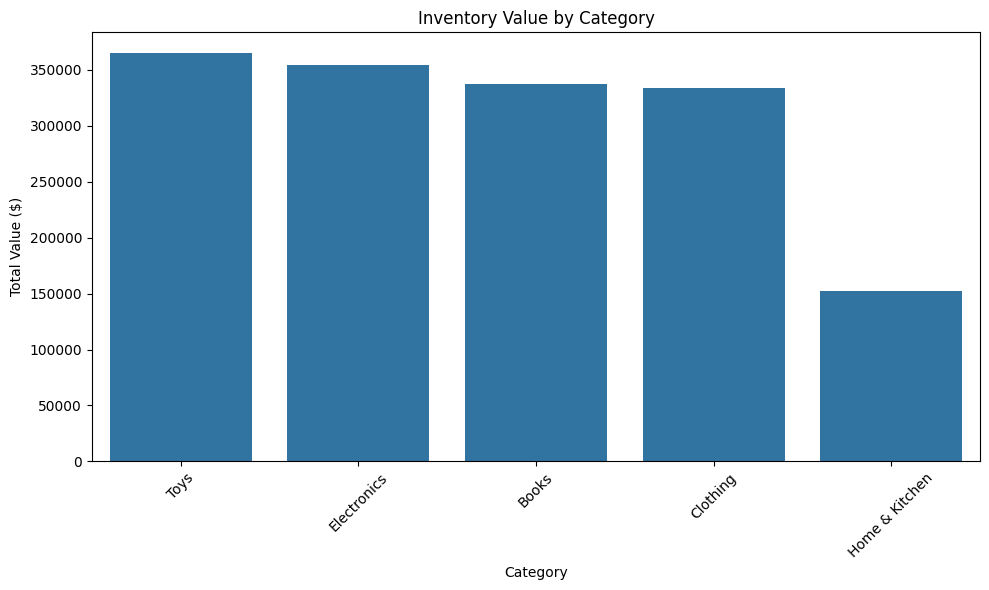

In [5]:
# Group by Category
category_values = df.groupby('Category')['InventoryValue'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_values.index, y=category_values.values)
plt.title('Inventory Value by Category')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
df['Stockout'] = df['QuantityInStock'] == 0
print(df['Stockout'])


0      False
1       True
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: Stockout, Length: 120, dtype: bool


In [8]:
df['NeedsReorder'] = df['QuantityInStock'] <= df['ReorderLevel']
print(df['NeedsReorder'])

0      False
1       True
2      False
3      False
4       True
       ...  
115    False
116    False
117    False
118    False
119     True
Name: NeedsReorder, Length: 120, dtype: bool


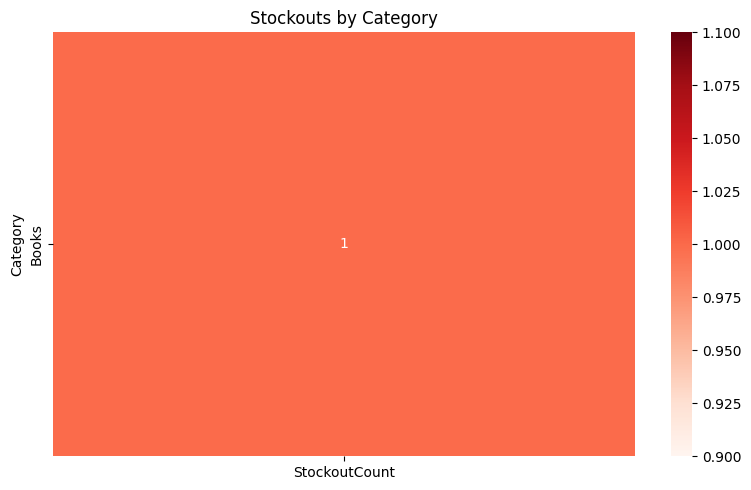

In [9]:
stockout_counts = df[df['Stockout']].groupby('Category').size().reset_index(name='StockoutCount')
stockout_pivot = stockout_counts.pivot_table(index='Category', values='StockoutCount')

plt.figure(figsize=(8, 5))
sns.heatmap(stockout_pivot, annot=True, cmap="Reds", fmt='g')
plt.title("Stockouts by Category")
plt.tight_layout()
plt.show()


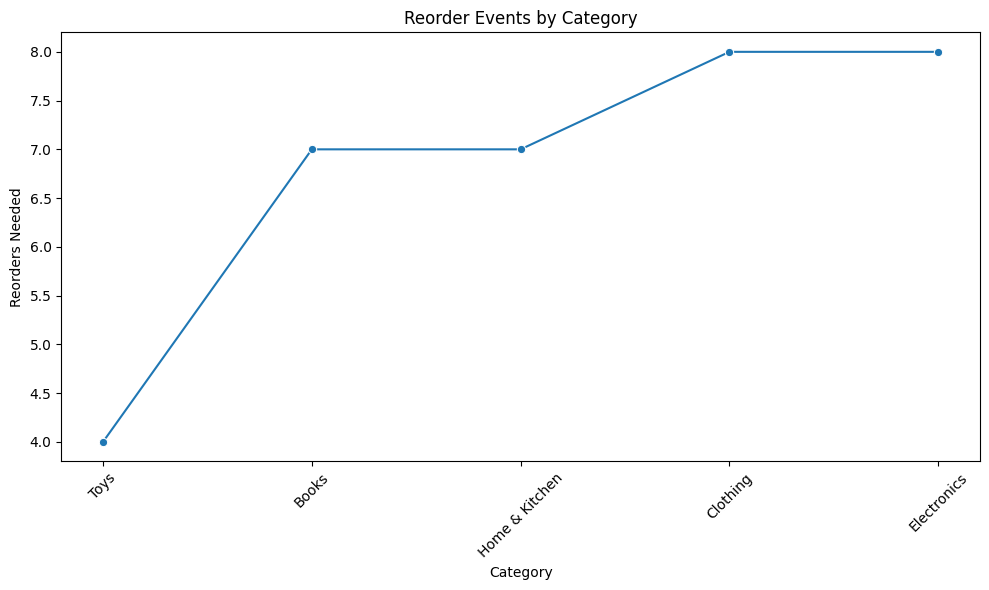

In [10]:
reorder_trend = df.groupby("Category")['NeedsReorder'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.lineplot(x=reorder_trend.index, y=reorder_trend.values, marker='o')
plt.title("Reorder Events by Category")
plt.ylabel("Reorders Needed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
cogs = df['InventoryValue'].sum()
average_inventory = df['QuantityInStock'].mean() * df['UnitCost'].mean()
stock_turnover = cogs / average_inventory

print("Stock Turnover:", round(stock_turnover, 2))


Stock Turnover: 113.13


In [12]:
days_inventory = 365 / stock_turnover
print("Days of Inventory:", round(days_inventory, 2))


Days of Inventory: 3.23


In [13]:
reorder_rate = df['NeedsReorder'].sum() / len(df)
print("Reorder Rate:", round(reorder_rate * 100, 2), "%")


Reorder Rate: 28.33 %


In [14]:
stockout_rate = df['Stockout'].sum() / len(df)
print("Stockout Rate:", round(stockout_rate * 100, 2), "%")


Stockout Rate: 0.83 %


In [15]:
print("\n--- KPI Summary ---")
print(f"Inventory Value: ${total_inventory_value:,.2f}")
print(f"Stock Turnover: {stock_turnover:.2f}")
print(f"Days of Inventory: {days_inventory:.2f}")
print(f"Reorder Rate: {reorder_rate:.2%}")
print(f"Stockout Rate: {stockout_rate:.2%}")



--- KPI Summary ---
Inventory Value: $1,542,800.52
Stock Turnover: 113.13
Days of Inventory: 3.23
Reorder Rate: 28.33%
Stockout Rate: 0.83%
